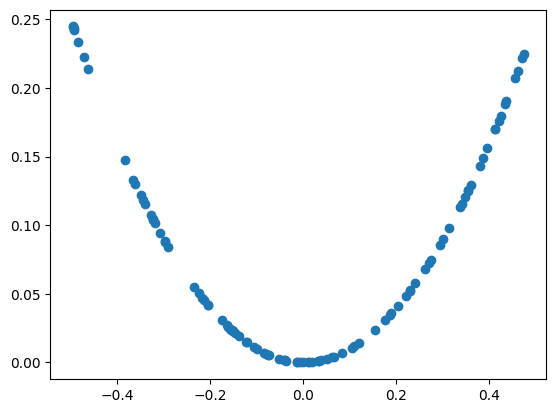

In [97]:
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt

def generate_samples(n = 100):
    x1 = rand(n) - 0.5
    x2 = x1**2
    x1.reshape(n, 1)
    x2.reshape(n, 1)
    return np.array([x1, x2])

data = generate_samples()
plt.scatter(data[0], data[1])
plt.show()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 25)                75        
                                                                 
 dense_38 (Dense)            (None, 1)                 26        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


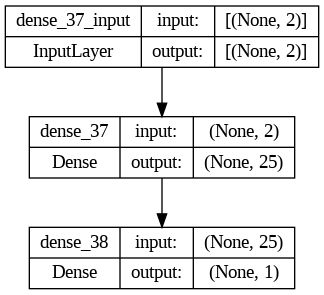

In [117]:
def discriminator(n_inputs = 2):
    model = Sequential()
    model.add(Dense(25, activation = 'relu', kernel_initializer = 'he_uniform', input_dim = n_inputs))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model
    
model_discriminator = discriminator()
model_discriminator.summary()
plot_model(model_discriminator, to_file = 'discriminator_plot.png', show_shapes = True, show_layer_names = True)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 15)                90        
                                                                 
 dense_20 (Dense)            (None, 2)                 32        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


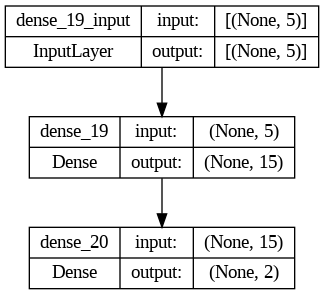

In [63]:
def generator(latent_dim, n_outputs = 2):
  model = Sequential()
  model.add(Dense(15, activation = 'relu', kernel_initializer = 'he_uniform', input_dim = latent_dim))
  model.add(Dense(n_outputs, activation = 'linear'))
  return model

model_generator = generator(5)
model_generator.summary()
plot_model(model_generator, to_file = 'generator.png', show_shapes = True, show_layer_names = True)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_15 (Sequential)  (None, 2)                 122       
                                                                 
 sequential_6 (Sequential)   (None, 1)                 101       
                                                                 
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


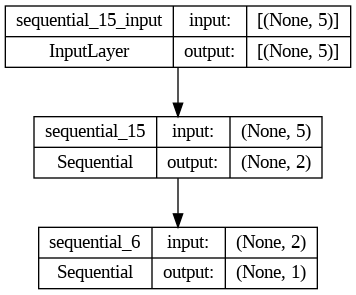

In [74]:
def GAN(discriminator, generator):
  discriminator.trainable = False
  model = Sequential()
  model.add(generator)
  model.add(discriminator)

  model.compile(loss = 'binary_crossentropy', optimizer = 'adam')
  return model

latent_dim = 5
gan_model = GAN(model_discriminator, model_generator)
gan_model.summary()
plot_model(gan_model, to_file = 'gan.png', show_shapes = True, show_layer_names = True)

In [115]:
def define_discriminator(n_inputs=2):
  model = Sequential()
  model.add(Dense(25, activation="relu", kernel_initializer="he_uniform", input_dim=n_inputs))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) 
  return model

def define_generator(latent_dim, n_outputs=2):
  model = Sequential()
  model.add(Dense(15, activation="relu", kernel_initializer="he_uniform", input_dim=latent_dim)) 
  model.add(Dense(n_outputs, activation="linear")) 
  return model

In [116]:
def define_gan(generator, discriminator):
  discriminator.trainable = False
  model = Sequential()
  model.add(generator)
  model.add(discriminator)    
  model.compile(loss="binary_crossentropy", optimizer="adam") 
  return model

In [110]:
def generate_real_samples(n):
  X1 = rand(n) - 0.5
  X2 = X1 * X1
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  X = hstack((X1, X2))
  y = ones((n, 1))
  return X, y

def generate_latent_points(latent_dim, n):
  x_input = randn(latent_dim * n)
  x_input = x_input.reshape(n, latent_dim)
  return x_input
  
def generate_fake_samples(generator, latent_dim, n):
  x_input = generate_latent_points(latent_dim, n)
  X = generator.predict(x_input)
  y = zeros((n, 1))
  return X, y

In [112]:
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
  x_real, y_real = generate_real_samples(n)
  _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
 
  x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
  _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)

  print(epoch, acc_real, acc_fake)

  pyplot.scatter(x_real[:, 0], x_real[:, 1], color="red")
  pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color="blue")
  filename = "generated_plot_e%03d.png" % (epoch+1) 
  pyplot.savefig(filename)
  pyplot.close()

In [113]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
  half_batch = int(n_batch / 2)
  for i in range(n_epochs):
    x_real, y_real = generate_real_samples(half_batch)
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    d_model.train_on_batch(x_real, y_real) 
    d_model.train_on_batch(x_fake, y_fake)
    
    x_gan = generate_latent_points(latent_dim, n_batch)
    y_gan = ones((n_batch, 1))
    
    gan_model.train_on_batch(x_gan, y_gan)
    if (i+1) % n_eval == 0:
        summarize_performance(i, g_model, d_model, latent_dim)

In [114]:
latent_dim = 5
discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan_model = define_gan(generator, discriminator)

train(generator, discriminator, gan_model, latent_dim)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 4ms/step
5999 0.3799999952316284 0.6700000166893005
4/4 [==============================] - 0s 4ms/step
7999 0.4399999976158142 0.5699999928474426
4/4 [==============================] - 0s 2ms/step
9999 0.5099999904632568 0.5400000214576721
